In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

D:\Softwares\anaconda3\envs\tf_kernel\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# Dropped some columns
df = df.drop(['Date', 'Holiday', 'Seasons'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
# Changing the column names
columns = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df.columns = columns
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df['functional'] = (df['functional']=='Yes').astype(int)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [6]:
# Choosing only data having hour as 12
df = df[df['hour']==12]
df = df.drop('hour', axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


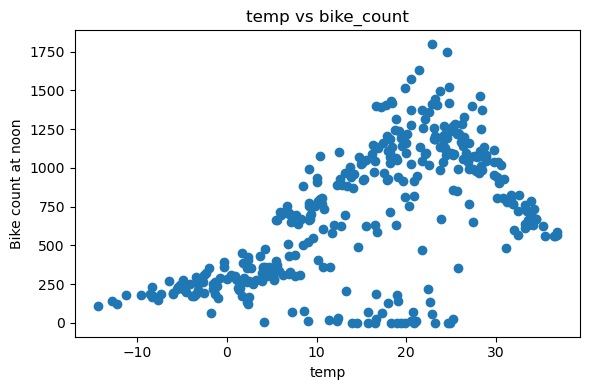

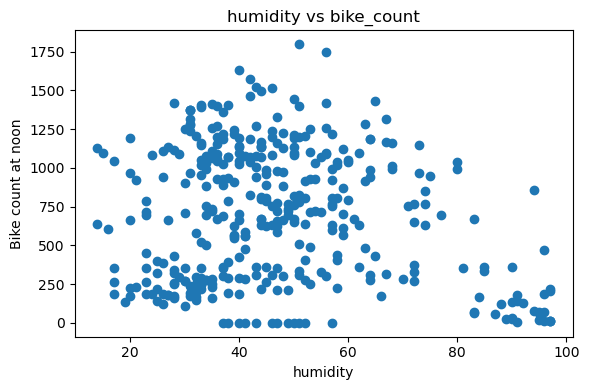

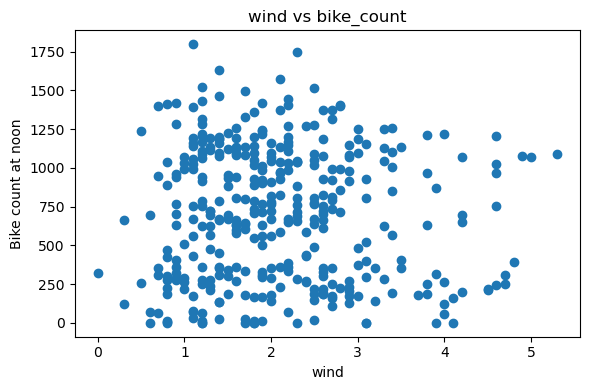

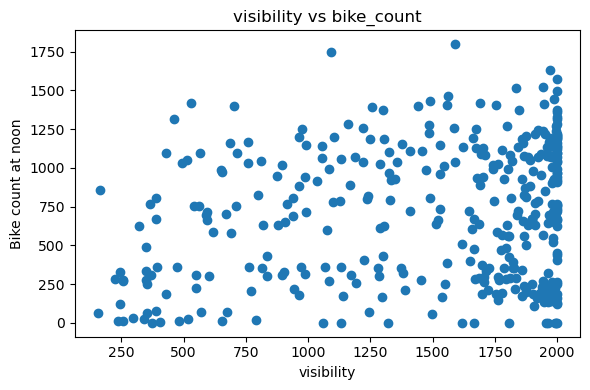

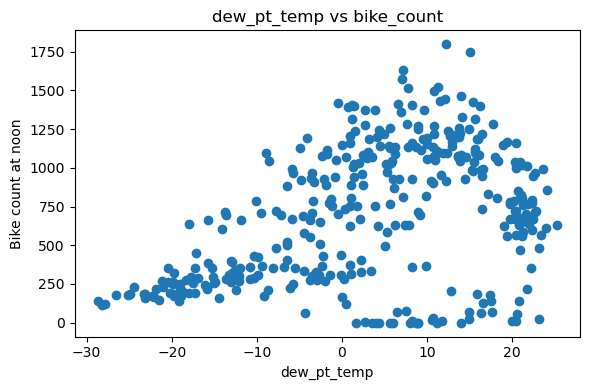

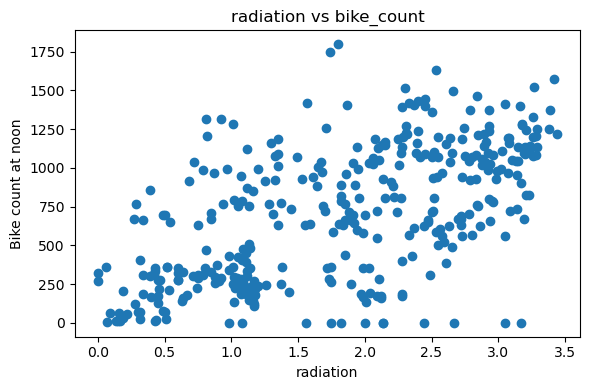

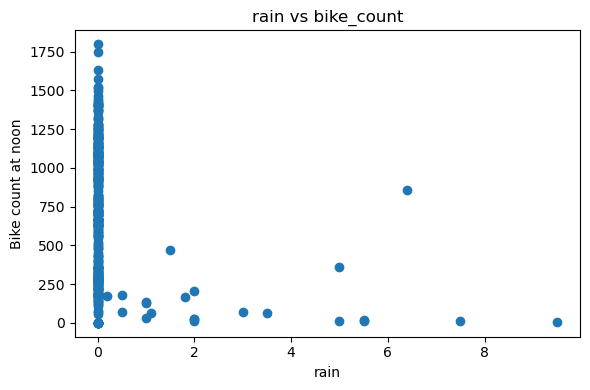

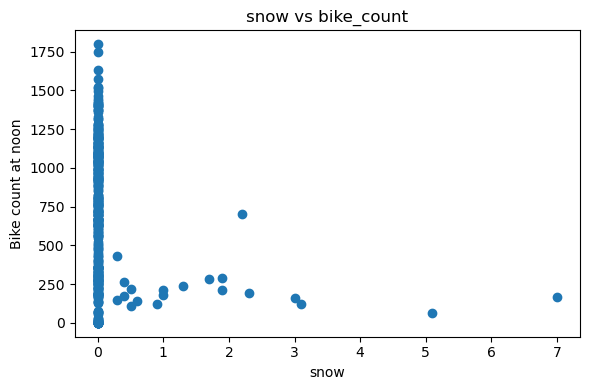

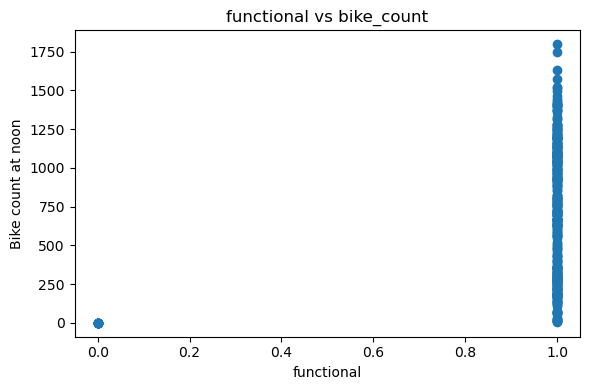

In [7]:
for label in df.columns[1:]:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[label], df['bike_count'])
    plt.title(f'{label} vs bike_count')
    plt.xlabel(label)
    plt.ylabel('Bike count at noon')
    plt.tight_layout()
    plt.show()

In [8]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Train, valid and test

In [9]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])

D:\Softwares\anaconda3\envs\tf_kernel\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
# Function to filter it out:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [73]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [13]:
# y = mx + c
# m -> coef_, c -> intercept, score -> R² (R-squared) metric:
# R² = 1 - (Residual Sum of Squares / Total Sum of Squares)
print(temp_reg.coef_, temp_reg.intercept_)
print(temp_reg.score(X_test_temp, y_test_temp))

[[19.88252055]] [403.51614301]
0.4101917537493849


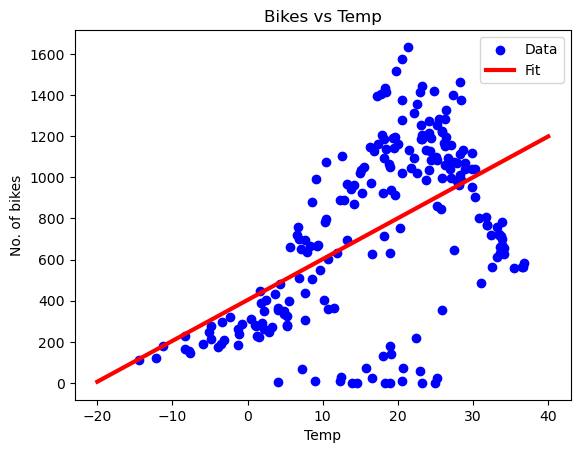

In [14]:
# Plotting and visualizing
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20,40,100).reshape(-1,1)
plt.plot(x, temp_reg.predict(x), label='Fit', color='red', linewidth=3)
plt.legend()
plt.xlabel('Temp')
plt.ylabel('No. of bikes')
plt.title('Bikes vs Temp')
plt.show()

## Multiple Linear Regression

In [56]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

D:\Softwares\anaconda3\envs\tf_kernel\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [57]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [58]:
print(all_reg.score(X_test_all, y_test_all))

0.4984820025551061


In [59]:
y_predict_all = all_reg.predict(X_test_all)

## Regression with Neural Network

In [76]:
temp_norm = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_norm.adapt(X_train_temp.reshape(-1))

In [20]:
temp_nn_model = tf.keras.Sequential([temp_norm, tf.keras.layers.Dense(1)])

In [21]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse')

In [22]:
history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=1000, validation_data=(X_valid_temp, y_valid_temp))

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

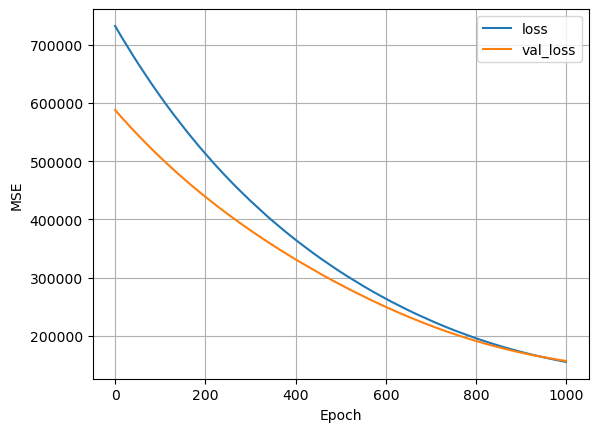

In [24]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


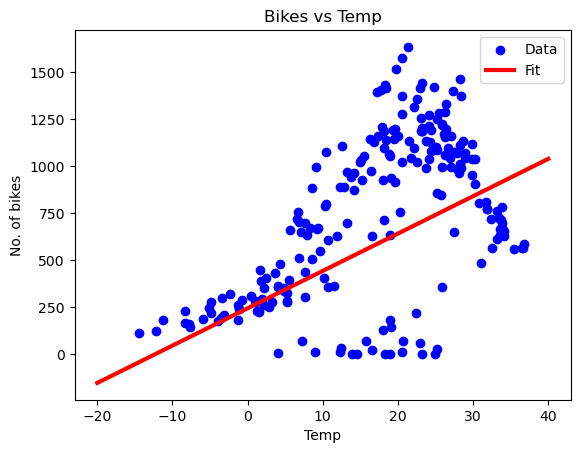

In [25]:
# Plotting and visualizing
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20,40,100).reshape(-1,1)
plt.plot(x, temp_nn_model.predict(x), label='Fit', color='red', linewidth=3)
plt.legend()
plt.xlabel('Temp')
plt.ylabel('No. of bikes')
plt.title('Bikes vs Temp')
plt.show()

## Neural Net

In [77]:
nn_model = tf.keras.Sequential([
    temp_norm, 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

In [78]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [79]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_valid_temp, y_valid_temp),
    verbose=0, epochs=100
)

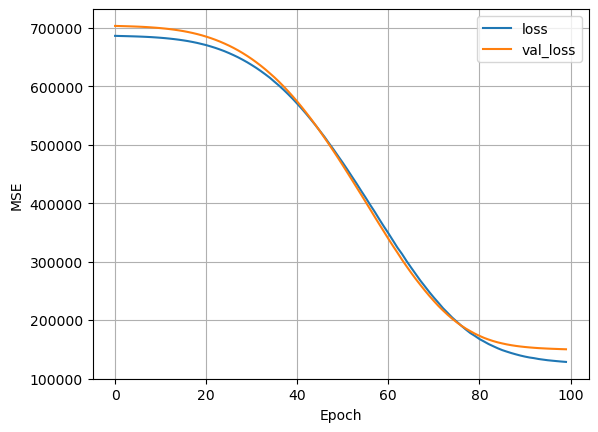

In [80]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


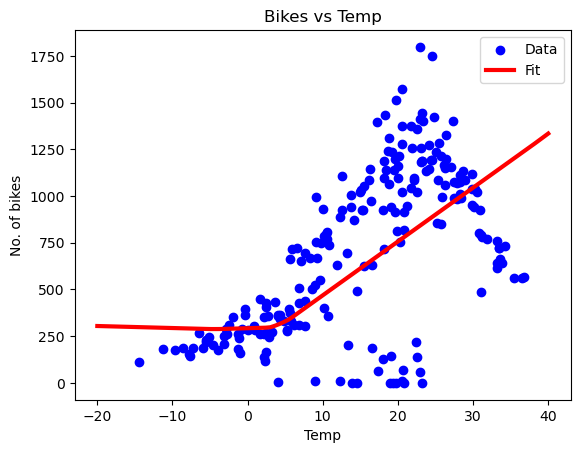

In [81]:
# Plotting and visualizing
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20,40,100).reshape(-1,1)
plt.plot(x, nn_model.predict(x), label='Fit', color='red', linewidth=3)
plt.legend()
plt.xlabel('Temp')
plt.ylabel('No. of bikes')
plt.title('Bikes vs Temp')
plt.show()

In [63]:
all_norm = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_norm.adapt(X_train_all)

D:\Softwares\anaconda3\envs\tf_kernel\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
nn_model = tf.keras.Sequential([
    all_norm, 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [65]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_valid_all, y_valid_all),
    verbose=0, epochs=100
)

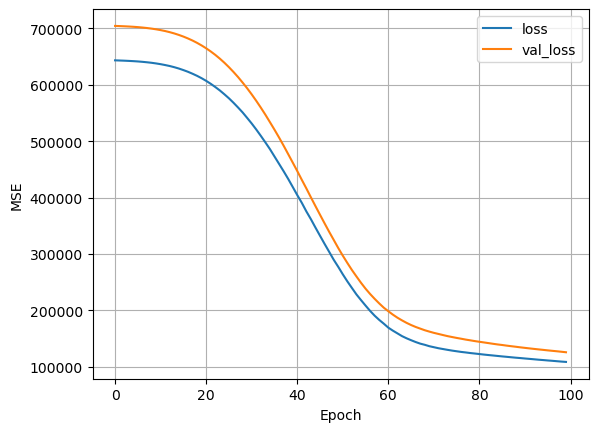

In [48]:
plot_loss(history)

In [66]:
y_predict_all_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [50]:
# MSE
def MSE(y_pred, y_real):
    return np.square(y_pred - y_real).mean()

In [51]:
MSE(y_predict_all, y_test_all)

np.float64(317738.1725269518)

In [52]:
MSE(y_predict_all_nn, y_test_all)

np.float64(136770.1242227389)

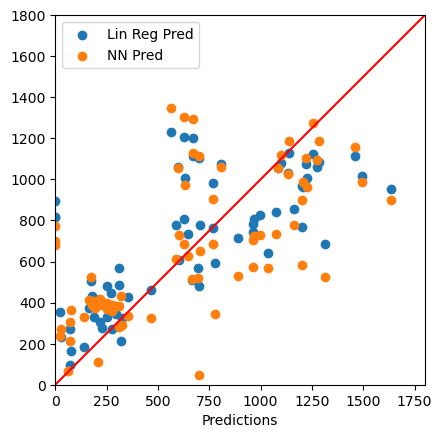

In [67]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_predict_all, label='Lin Reg Pred')
plt.scatter(y_test_all, y_predict_all_nn, label='NN Pred')
plt.xlabel('True Values')
plt.xlabel('Predictions')
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')